#Machine Learning Final
###Author: Joshua Kearstan
###Class: Cheg 472,
###Professor: Jude Okolie

#Preprocessing and EDA Section:


In [75]:
!pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
import shap
import streamlit as st


I first Imported and installed all necessary Libraries

In [76]:
# Load data
data = pd.read_excel("/content/Dataset 1 - Copy.xlsx")

# Read the Excel file
df = pd.read_excel("/content/Dataset 1 - Copy.xlsx")

# Get the current column names
current_columns = df.columns.tolist()

# Define the desired new column names
new_column_names = [
    'Fixed Carbon', 'Ash', 'H', 'N', 'Temperature (c)',
    'Biochar Yield (%)', 'Volatile Matter', 'C', 'O', 'N', 'Residence time (min)', 'Temperature (c)',
    'Heating Rate (C/min)', 'Biochar Yield (%)',
    'Fixed Carbon', 'Volatile Matter', 'Ash', 'C', 'H', 'O', 'N',
]

# Create a dictionary mapping old names to new names
column_mapping = {old_name: new_name for old_name, new_name in zip(current_columns, new_column_names)}

# Rename the columns
df = df.rename(columns=column_mapping)

# Print the updated column names
print(df.columns)

Index(['Fixed Carbon', 'Ash', 'H', 'N', 'Temperature (c)', 'Biochar Yield (%)',
       'Volatile Matter', 'C', 'O', 'N', 'Residence time (min)',
       'Temperature (c)', 'Heating Rate (C/min)', 'Biochar Yield (%)',
       'Fixed Carbon', 'Volatile Matter', 'Ash', 'C', 'H'],
      dtype='object')


This section is to load, then read, then rename the columns from the dataset as they were inputted as "Unnamed : x" which caused issues later on in my program which you will see.  I apologize that I couldn't figure out why this wasn't fixing itself after I renamed and labeled everything but I had to submit.

In [77]:

# Print the description of the dataset
print("The descriptive statistics of the dataset")
print(df.describe())


# Get the data types of all columns
data_types = df.dtypes
print("The data types of each column:")
print(data_types)


# Get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Print the results
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

The descriptive statistics of the dataset
        Fixed Carbon     Ash       H       N  Temperature (c)  \
count            227  229.00  227.00  227.00           228.00   
unique            32   46.00   44.00   44.00            42.00   
top     Cotton stalk   10.17   82.38    7.45            43.95   
freq              31   19.00   19.00   19.00            26.00   

        Biochar Yield (%)  Volatile Matter       C    O    N  \
count              227.00           211.00  227.00  228  227   
unique              34.00            36.00   40.00   10   21   
top                  5.81            41.12    1.12   30  600   
freq                27.00            26.00   26.00  119   40   

        Residence time (min)  Temperature (c)  Heating Rate (C/min)  \
count                    227            229.0                161.00   
unique                     6            218.0                158.00   
top                       10             24.3                 46.98   
freq                     10

This section gives summary statistics of all of the data.

In [78]:
# Check for missing data
missing_data = df.isnull().sum()
print("Total missing values for each column:")

#Display columns with missing data

missing_columns = missing_data[missing_data > 0]
print(missing_columns)

df_cleaned = df.dropna()

Total missing values for each column:
Fixed Carbon             2
H                        2
N                        2
Temperature (c)          1
Biochar Yield (%)        2
Volatile Matter         18
C                        2
O                        1
N                        2
Residence time (min)     2
Heating Rate (C/min)    68
Biochar Yield (%)       69
Fixed Carbon            69
Volatile Matter         65
Ash                     78
C                       78
H                       66
dtype: int64


This section finds how many missing values there are in the data and drops them.

In [79]:
#Check data types to identify numeric columns
df.dtypes

,0
Fixed Carbon,object
Ash,object
H,object
N,object
Temperature (c),object
Biochar Yield (%),object
Volatile Matter,object
C,object
O,object
N,object


In [80]:
# Assuming 'data' is your DataFrame

# Select columns with object dtype
object_cols = data.select_dtypes(include=['object']).columns

# Convert object columns to numeric (float)
for col in object_cols:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. It might contain non-numeric values.")

This section attempts to relabel each column from a column to a numerical value for further coding.

In [81]:
# Get summary statistics for numerical columns
numerical_stats = df_cleaned.describe()
# Get summary statistics for categorical columns
categorical_stats = df_cleaned.select_dtypes(include='object').describe()

# Print the results
print("Summary Statistics for Numerical Columns:")
print(numerical_stats)
print("\nSummary Statistics for Categorical Columns:")
print(categorical_stats)

Summary Statistics for Numerical Columns:
        Fixed Carbon     Ash       H       N  Temperature (c)  \
count            150  150.00  150.00  150.00           150.00   
unique            26   34.00   34.00   34.00            32.00   
top       Rice Straw   10.16   76.86   12.98            40.06   
freq              19    7.00    7.00    7.00            14.00   

        Biochar Yield (%)  Volatile Matter       C    O    N  \
count              150.00           150.00  150.00  150  150   
unique              27.00            31.00   31.00    4   15   
top                  5.81            40.23    0.69   30  500   
freq                15.00            14.00   14.00  101   27   

        Residence time (min)  Temperature (c)  Heating Rate (C/min)  \
count                    150           150.00                150.00   
unique                     4           147.00                147.00   
top                       10            34.98                 46.98   
freq                      9

This is a repeat of summary statistics after preproccesing is over.

In [83]:
# Get the actual column names from your DataFrame
actual_columns = data.columns.tolist()

# Print the actual column names to check them
print("Actual columns in DataFrame:", actual_columns)

# Select the columns to drop based on the actual column names
columns_to_drop = [col for col in actual_columns if col in ['Fixed Carbon', 'Ash', 'H', 'N', 'Temperature (c)',
              'Biochar Yield (%)', 'Volatile Matter', 'C', 'O', 'N.1', 'Residence time (min)', 'Temperature (c).1',
              'Heating Rate (C/min)', 'Biochar Yield (%)',
              'Fixed Carbon.1', 'Volatile Matter.1', 'Ash.1', 'C.1', 'H.1', 'O.1', 'N.2']]

# Drop the selected columns
X = data.drop(columns=columns_to_drop, axis=1)

# Select the columns for your target variable (y)
y = data[columns_to_drop]  # Assuming these are your target columns

Actual columns in DataFrame: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']


This is where it gets confusing for me, the code and python itself should recognize the names of each column name above and ouput them from this dataframe however, it outputs unnamed column 1-18.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If you want boxplots for only specific columns, you can list them:
specific_columns = ['Fixed Carbon', 'Ash', 'H', 'N', 'Temperature (c)',
              'Biochar Yield (%)', 'Volatile Matter', 'C', 'O', 'N.1', 'Residence time (min)', 'Temperature (c).1',
              'Heating Rate (C/min)', 'Biochar Yield (%)',
              'Fixed Carbon.1', 'Volatile Matter.1', 'Ash.1', 'C.1', 'H.1', 'O.1', 'N.2']  # Example
for col in specific_columns:
    if col in data.columns:  # Check if column exists
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=data[col])
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
        plt.show()

This is a simple boxplot output code.

In [93]:
# Handle missing values (e.g., imputation or removal)
data.ffill(inplace=True)  # Replace missing values with the previous value

# Split data into features (X) and target variable (y)
X = data.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], axis=1)  # Replace 'target_column' with your target variable
y = data[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This section rehandles the missing values and then splits data for the test-train section of this code.

In [94]:
# Removal of outliers
df_cleaned = df.copy()
for col in columns_to_check:
   df_cleaned = df_cleaned[~df_cleaned[col].isin(outliers_dict[col])]

# Check to make sure that the outliers were removed
for col in columns_to_check:
   if any(outlier in df_cleaned[col].values for outlier in outliers_dict[col]):
       print(f"Outlier(s) from column '{col}' were not removed.")
   else:
       print(f"All outliers were successfully removed from column '{col}'.")

Removal of outliers for better data analysis.

In [95]:
# Display the first few rows of the original dataset
print("Original DataFrame:")
print(df_cleaned.head())

# Display the first few rows of the cleaned dataset
print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, prefix_sep='_')

# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded.head())

Original DataFrame:
        Fixed Carbon                                        Ash  \
0                NaN                                INPUTS (10)   
1  Type of Feedstock  Feedstock Proximate analysis (vol. % db.)   
2                NaN                               Fixed carbon   
3            Corncob                                  18.006795   
4            Corncob                                  18.006795   

                 H         N                           Temperature (c)  \
0              NaN       NaN                                       NaN   
1              NaN       NaN  Feedstock Ultimate analysis (vol. % db.)   
2  Volatile matter       Ash                                         C   
3        78.708947  3.284258                                     48.12   
4        78.708947  3.284258                                     48.12   

  Biochar Yield (%) Volatile Matter     C                     O  \
0               NaN             NaN   NaN                   NaN  

#Setting up for correlation and pairplot

In [96]:
# Assume 'data' is your DataFrame

# 1. Creating new features from existing ones
# Example: Creating a new feature 'total_yield' by adding two existing features
if 'Biochar Yield (%)' in data.columns and 'Biochar Yield (%)' in data.columns:
    data['total_yield'] = data['Biochar Yield (%)'] + data['Biochar Yield (%)']
else:
    print("Columns 'Biochar Yield (%)' and/or 'Biochar Yield (%)' not found in DataFrame.")

# 2. Transforming existing features
# Example: Applying logarithmic transformation to a skewed feature
# Assuming 'Fixed Carbon' is the skewed feature
if 'Fixed Carbon' in data.columns:
    data['log_Fixed_Carbon'] = np.log(data['Fixed Carbon'] + 1)  # Add 1 to avoid log(0)
else:
    print("Column 'Fixed Carbon' not found in DataFrame.")

# 3. Encoding categorical features (if any)
# Example: Using one-hot encoding for the 'Feedstock' feature (replace if different)
if 'Feedstock' in data.columns:
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for non-sparse output
    encoded_data = encoder.fit_transform(data[['Feedstock']])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Feedstock']))
    data = pd.concat([data, encoded_df], axis=1)
    data.drop('Feedstock', axis=1, inplace=True)
else:
    print("Column 'Feedstock' not found in DataFrame.")

# 4. Polynomial features
# Example: Creating polynomial features of degree 2 for 'Temperature (c)' and 'Residence time (min)'
if 'Temperature (c)' in data.columns and 'Residence time (min)' in data.columns:
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2)
    poly_features = poly.fit_transform(data[['Temperature (c)', 'Residence time (min)']])
    poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Temperature (c)', 'Residence time (min)']))
    data = pd.concat([data, poly_df], axis=1)
else:
    print("Columns 'Temperature (c)' and/or 'Residence time (min)' not found in DataFrame.")


Columns 'Biochar Yield (%)' and/or 'Biochar Yield (%)' not found in DataFrame.
Column 'Fixed Carbon' not found in DataFrame.
Column 'Feedstock' not found in DataFrame.
Columns 'Temperature (c)' and/or 'Residence time (min)' not found in DataFrame.


In [97]:
def handle_outliers_iqr(data, column):
    """
    Identifies and handles outliers in a specified column using the IQR method.

    Args:
        data: The pandas DataFrame containing the data.
        column: The name of the column to handle outliers for.

    Returns:
        The DataFrame with outliers capped or removed (depending on the method).
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers:
    data[column] = np.clip(data[column], lower_bound, upper_bound)

    # Alternatively, removing outliers:
    # data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

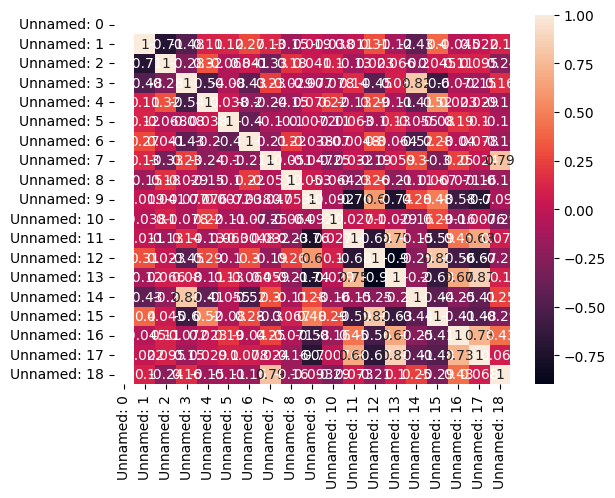

In [90]:
# Correlation matrix
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns

# Check if numerical_data has any columns
if numerical_data.empty:
    print("No numerical columns found in the DataFrame. Cannot create correlation matrix.")
else:
    corr_matrix = numerical_data.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

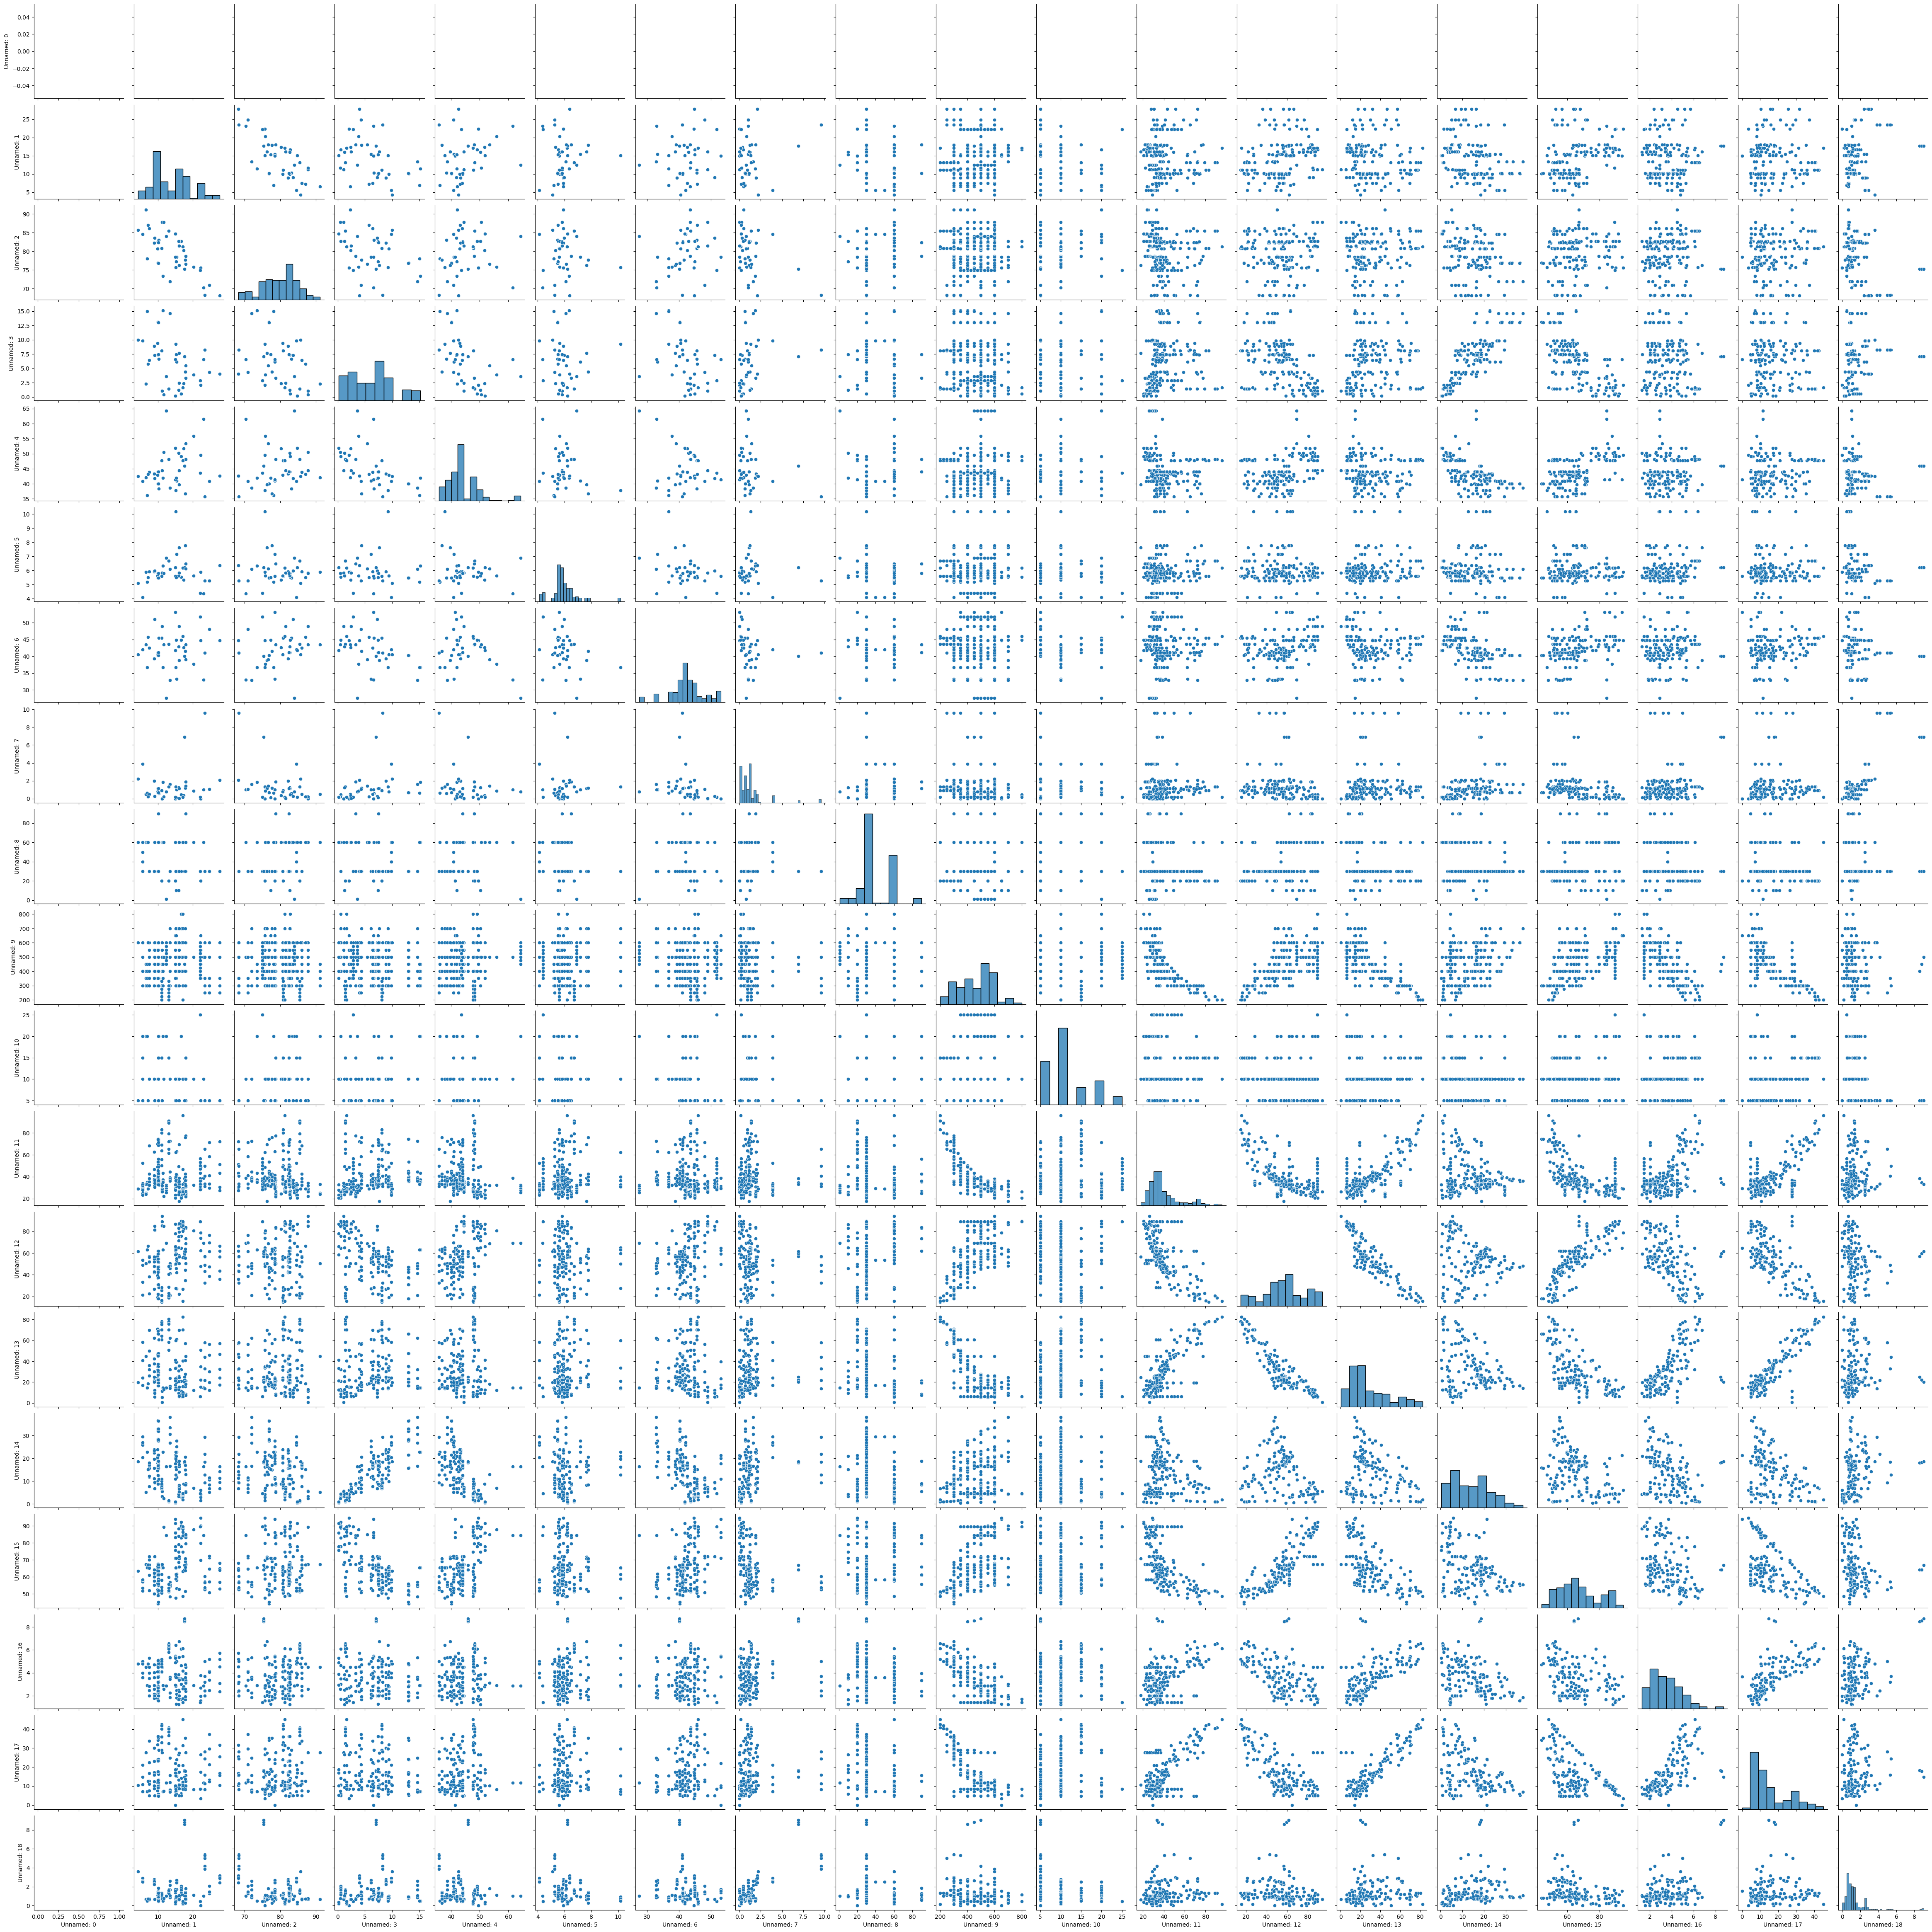

In [91]:
# Pair plots
sns.pairplot(data)
plt.show()

Above are the proper correlation matrices and pairplot for all of the data stacked up against eachother.  I put the box plot below as a proof that there is something wrong with the way python itself is inputting my code because above it works and below for the box plots and histograms it refuses to output anything when I have used this code thousands of times and its worked.

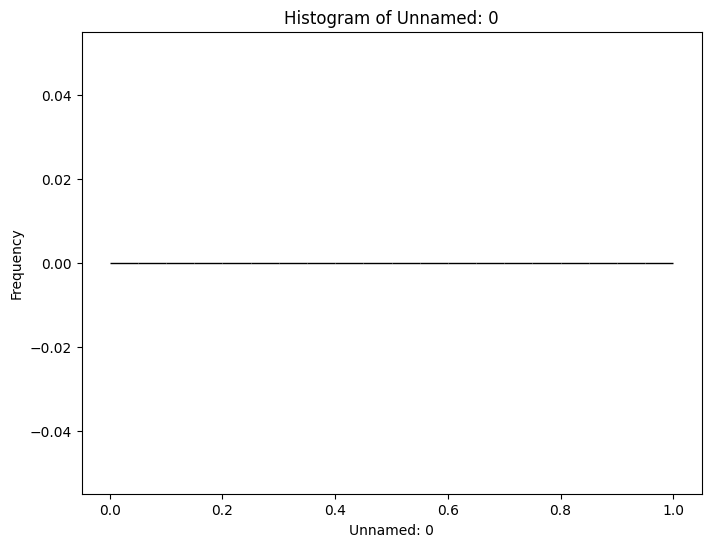

ValueError: List of boxplot statistics and `positions` values must have same the length

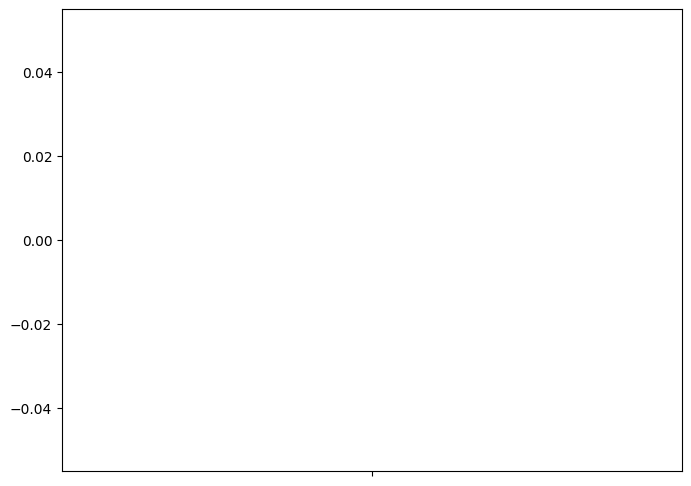

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Get numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Loop through numerical columns and create plots
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

#PCA

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 0']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


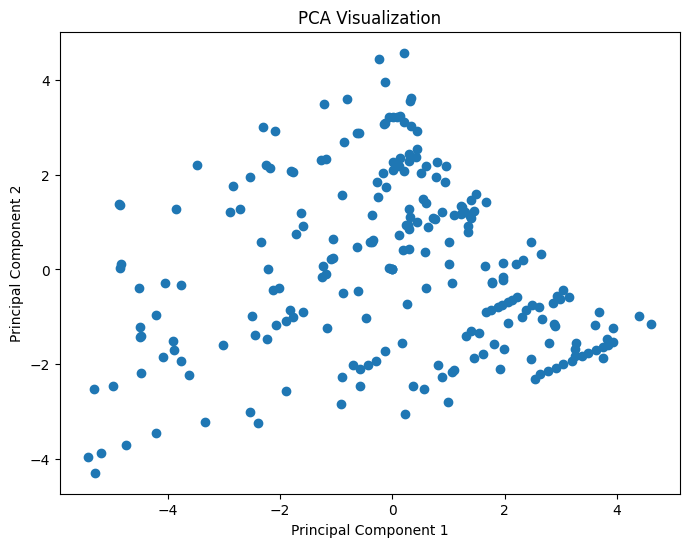

Explained Variance Ratio: [0.29470256 0.18928998]


In [101]:
# 1. Standardize the data (important for PCA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # Import SimpleImputer


X = data.select_dtypes(include=['float64', 'int64'])  # Select numerical features

# Impute missing values before scaling
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Scale the imputed data

# 2. Apply PCA
n_components = 2  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)  # Now PCA is defined
principal_components = pca.fit_transform(X_scaled)

# 3. Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# 4. (Optional) Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# 5. (Optional) Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

#Machine Learning Section

In [116]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# Hyperparameter tuning (optional)
param_grid = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [5, 10]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]},
    # Add hyperparameters for other models as needed
}

# Train and evaluate models
model_results = []
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model

    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    model_results.append((name, r2, mse, mae))

# Print results
for name, r2, mse, mae in model_results:
    print(f"{name}: R² = {r2:.3f}, MSE = {mse:.3f}, MAE = {mae:.3f}")

# Visualize model performance (e.g., bar chart)
model_names = [name for name, _, _, _ in model_results]
r2_scores = [r2 for _, r2, _, _ in model_results]
mse_scores = [mse for _, _, mse, _ in model_results]
mae_scores = [mae for _, _, _, mae in model_results]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, label='R²')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R²)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Similarly, you can create bar charts for MSE and MAE.  REPEAT FOR ANY OTHER POSSIBLE POINTS

ValueError: at least one array or dtype is required

In [113]:
# Plot Partial Dependence Plots for a specific model (e.g., XGBoost)
model = XGBRegressor()
model.fit(X_train, y_train)

# Create the explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the partial dependence plots
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_test, plot_type="bar", ax=ax)
plt.show()

# Plot individual feature importance
shap.dependence_plot("feature_name", shap_values, X_test, interaction_index=None)
plt.show()

IndexError: list index out of range

#Streamlit App and Dependence

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your trained model (replace with your actual model loading code)
# For example, if you saved your model using pickle:
import pickle
open('your_model.pkl', 'rb') as f:
model = pickle.load(f)
# Define the app
def app():
    st.title("Machine Learning Model")

    # Input fields for user input
    # ... (Define input fields based on your model's requirements)

    # Predict button
    if st.button("Predict"):
        # Preprocess user input
        # ... (Preprocess the input data)
        prediction = model.predict(preprocessed_input)
        st.write("Predicted value:", prediction)

if __name__ == "__main__":
    app()

In [ ]:
# Define the app
def app():
    st.title("Biochar Yield Prediction App")

    # Input fields for user input
    fixed_carbon = st.number_input("Enter Fixed Carbon")
    ash = st.number_input("Enter Ash Content")
    hydrogen = st.number_input("Enter Hydrogen Content")
    nitrogen = st.number_input("Enter Nitrogen Content")
    temperature = st.number_input("Enter Temperature (Celsius)")
    volatile_matter = st.number_input("Enter Volatile Matter")
    carbon = st.number_input("Enter Carbon Content")
    oxygen = st.number_input("Enter Oxygen Content")
    residence_time = st.number_input("Enter Residence Time (minutes)")
    heating_rate = st.number_input("Enter Heating Rate (Celsius/minute)")

    # Create a DataFrame with user input
    user_input = pd.DataFrame([[fixed_carbon, ash, hydrogen, nitrogen, temperature, volatile_matter, carbon, oxygen, residence_time, heating_rate]],
                              columns=['Fixed Carbon', 'Ash', 'H', 'N', 'Temperature (c)', 'Volatile Matter', 'C', 'O', 'Residence time (min)', 'Heating Rate (C/min)'])

    # Make prediction
    prediction = model.predict(user_input)

    # Display the prediction
    st.write("Predicted Biochar Yield (%):", prediction[0])

if __name__ == "__main__":
    app()

In [ ]:
streamlit run app.py